## 4. 가설 설정 배경

* 제품 중 유기농 제품 비율 10.1% 불과
* 그럼에도 전체 사우이 판매 분석에서 유기농 제품 다수 포진한 특징 발견하여 유기농 선호 주목자 주목

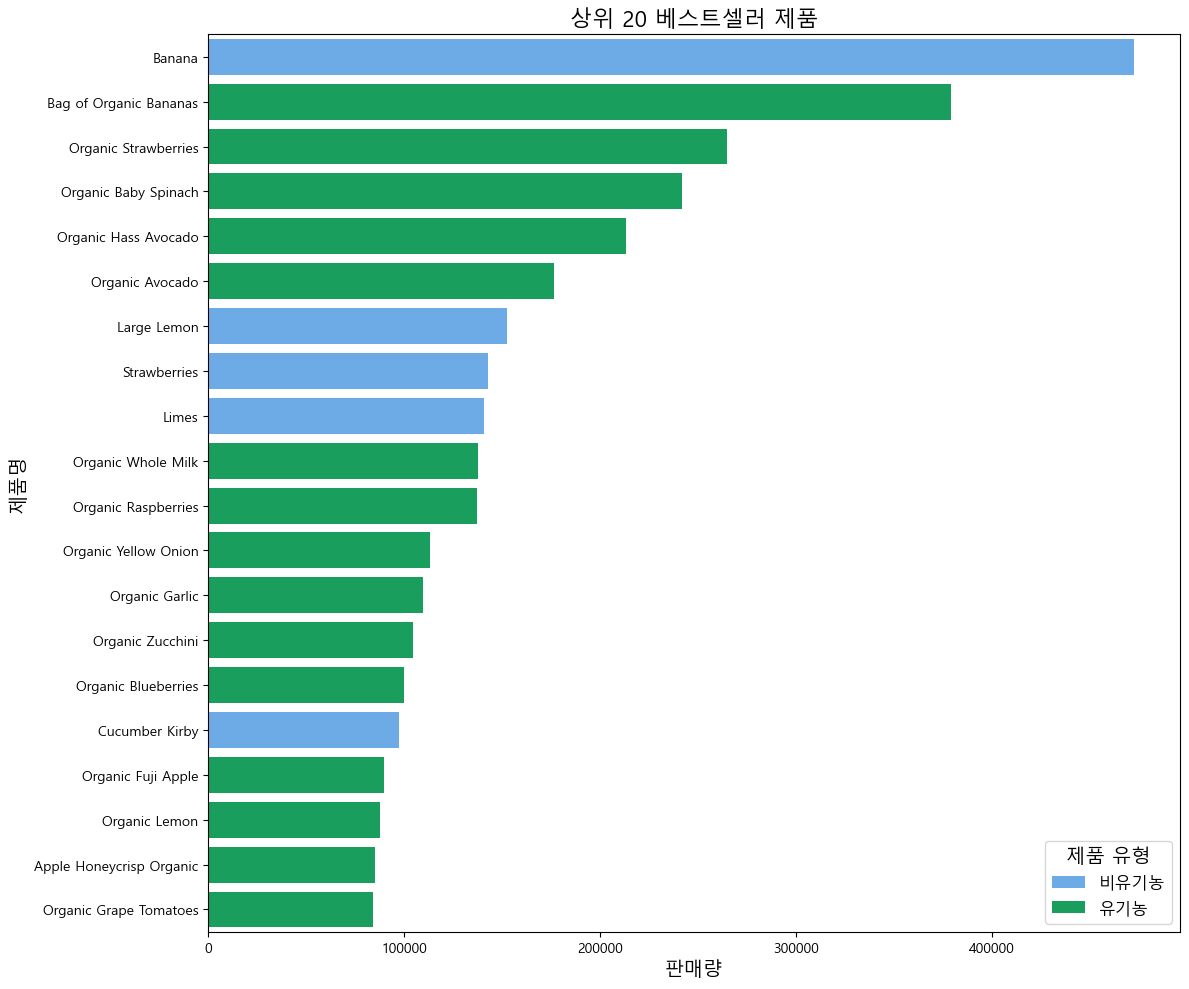

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
products_path = 'products.csv'
order_products_prior_path = 'order_products__prior.csv'

products_df = pd.read_csv(products_path)
order_products_prior_df = pd.read_csv(order_products_prior_path)

# 각 제품의 판매량 계산
product_sales = order_products_prior_df['product_id'].value_counts().reset_index()
product_sales.columns = ['product_id', 'sales']

# 상위 20개 제품 추출
top_20_products = product_sales.head(20)

# 상위 20개 제품의 상세 정보 추가
top_20_products = top_20_products.merge(products_df, on='product_id')

# 'is_organic' 컬럼 추가
top_20_products['is_organic'] = top_20_products['product_name'].str.contains('Organic').astype(str)

# 결과 출력
#print(top_20_products)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 상위 20개 제품 시각화
plt.figure(figsize=(12, 10))
sns.barplot(x='sales', y='product_name', data=top_20_products, hue='is_organic', dodge=False, palette={'False': '#58ACFA', 'True': '#04B45F'})

# 그래프 제목 및 축 레이블 설정
plt.title('상위 20 베스트셀러 제품', fontsize=16)
plt.xlabel('판매량', fontsize=14)
plt.ylabel('제품명', fontsize=14)

# 범례 설정
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['비유기농', '유기농']
plt.legend(handles, labels, title='제품 유형', fontsize=12, title_fontsize=14, loc='lower right')

# 그래프 저장
plt.tight_layout()
plt.savefig('상위_20_베스트셀러_제품.png', dpi=300, bbox_inches='tight')
plt.show()

# 그래프 출력
plt.tight_layout()
plt.show()

